### Import Data

In [2]:
import pandas as pd
df = pd.read_csv("reliance_5m.csv")

# remove first couple rows
data = df.loc[2:].copy()

# Convert the 'Price' column to datetime
data['Datetime'] = pd.to_datetime(data['Price'])

# Set it as the index
data = data.set_index('Datetime')

# Optionally, drop the old 'Price' column if you don't need it
data = data.drop(columns=['Price'])

# convert all values to numeric
data = data.apply(pd.to_numeric, errors="coerce")

data.head()

,Close,High,Low,Open,Volume
Datetime,,,,,
2025-09-11 09:15:00+05:30,1380.900024,1381.000000,1375.400024,1376.300049,0
2025-09-11 09:20:00+05:30,1382.199951,1382.199951,1380.699951,1380.900024,103563
2025-09-11 09:25:00+05:30,1380.599976,1383.000000,1380.599976,1382.400024,140118
2025-09-11 09:30:00+05:30,1380.300049,1381.800049,1380.300049,1380.699951,69051
2025-09-11 09:35:00+05:30,1381.699951,1381.900024,1379.599976,1380.199951,86777


### Plotting CandleSticks

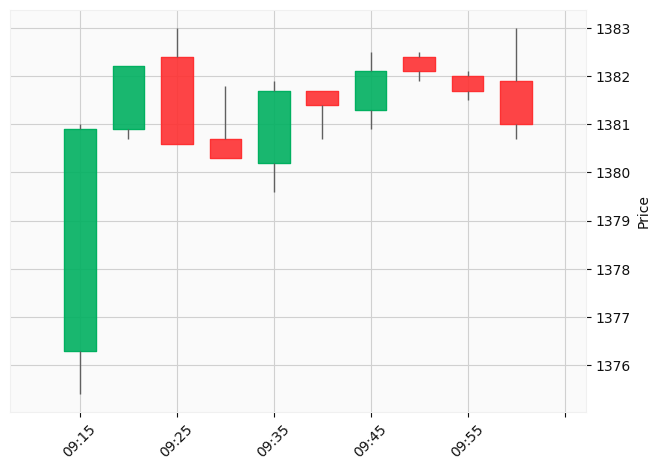

In [3]:
import mplfinance as mpf

mpf.plot(data.iloc[:10], type='candle', volume=False, style='yahoo')

### Grouping Data by Date

In [7]:
data['Date'] = data.index.date
groups = data.groupby('Date')

<u><h2 align = 'center'> Insight 1 </h2></u>

### Buy the second interval if first candle of the day is green

In [25]:
trades = [];

for day, df in groups:
    df = df.sort_index()

    # skip any day with less than two candles
    if len(df) < 2:
        continue
    
    candle1 = df.iloc[0]
    candle2 = df.iloc[1]

    # if the first candle is green
    if candle1['Close'] > candle1['Open']:
        # buy at the start of second candle at sell at it's close
        return_per = ((candle2['Close'] - candle2['Open']) / candle2['Open']) * 100

        trades.append({
            'Date': day,
            'Entry': candle2['Open'],
            'Exit': candle2['Close'],
            'Return %': return_per
        })

trades = pd.DataFrame(trades)

### Returns accross the dataset

In [42]:
# printing some trades
print(trades.head())

# printing total return percentage
total_return = trades["Return %"].sum()
print('\n\n' + 'Total Return % = ' + str(float(total_return)))

         Date        Entry         Exit  Return %
0  2025-09-11  1380.900024  1382.199951  0.094136
1  2025-09-12  1386.599976  1387.000000  0.028849
2  2025-09-15  1395.199951  1395.300049  0.007174
3  2025-09-16  1404.199951  1405.400024  0.085463
4  2025-09-17  1409.800049  1412.000000  0.156047


Total Return % = 2.6205058618806403
